# Can Jim beat Aleks to 3000 in Rummy?
question: whose running sum will reach 3000 first?  
players: Jim vs Aleks  
prize: glory


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
jim_scores = [
    -68, 
    83,
    -62,
    142,
    112,
    -54,
    94,
    59,
    73,
    100
]

aleks_scores = [
    110,
    94,
    114,
    23,
    29,
    80,
    44,
    51,
    96,
    145
]

## summary statistics

In [4]:
# average game score

jim_mean = sum(jim_scores)/len(jim_scores)
print("Jim's mean: ", jim_mean)

aleks_mean = sum(aleks_scores)/len(aleks_scores)
print("Aleks' mean: ", aleks_mean)

Jim's mean:  47.9
Aleks' mean:  78.6


In [5]:
# pos/neg ratio

jim_ratio = len([x for x in jim_scores if x < 0])/len(jim_scores)
print(f"Jim has gone negative {jim_ratio*100}% of the time")

aleks_ratio = len([x for x in aleks_scores if x < 0])/len(aleks_scores)
print(f"Aleks has gone negative {aleks_ratio*100}% of the time")

Jim has gone negative 30.0% of the time
Aleks has gone negative 0.0% of the time


In [6]:
# variance 

variance_jim = np.var(jim_scores, ddof=1)  # setting ddof=1 for sample variance (small data set!)
variance_aleks = np.var(aleks_scores, ddof=1)  

variance_jim, variance_aleks

(6186.988888888889, 1633.377777777778)

In [7]:
# calculate the quartiles
Q1_jim = np.percentile(jim_scores, 25)
Q3_jim = np.percentile(jim_scores, 75)
IQR_jim = Q3_jim - Q1_jim

Q1_aleks = np.percentile(aleks_scores, 25)
Q3_aleks = np.percentile(aleks_scores, 75)
IQR_aleks = Q3_aleks - Q1_aleks

print("Jim's Scores IQR:", IQR_jim)
print("Aleks's Scores IQR:", IQR_aleks)

# find the outliers
def count_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return len(outliers), outliers

jim_outliers_count, jim_outliers = count_outliers(jim_scores)
aleks_outliers_count, aleks_outliers = count_outliers(aleks_scores)

print("Jim's Scores Outliers Count:", jim_outliers_count, "Outliers:", jim_outliers)
print("Aleks's Scores Outliers Count:", aleks_outliers_count, "Outliers:", aleks_outliers)



Jim's Scores IQR: 124.25
Aleks's Scores IQR: 60.75
Jim's Scores Outliers Count: 0 Outliers: []
Aleks's Scores Outliers Count: 0 Outliers: []


Jim's scores, having a substantially higher IQR, can imply that his performance is more inconsistent or subject to a wider range of influencing factors. 
Aleks's more consistent scores, seen through a lower IQR, can suggest a narrower influence of external factors or a more stable performance across measurements


## Visualizations

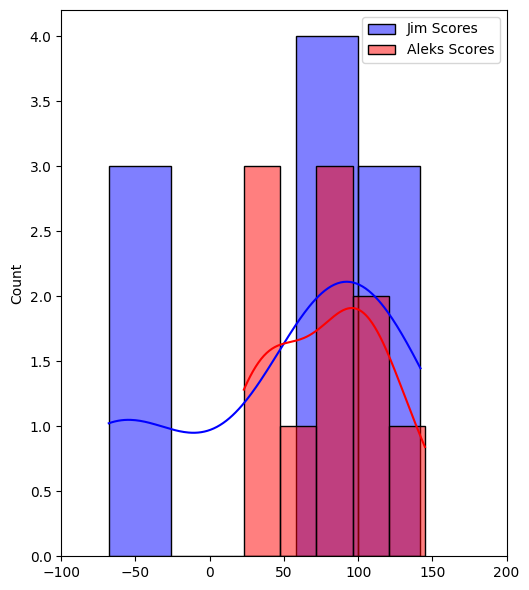

In [8]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
sns.histplot(jim_scores, color="blue", kde=True, label='Jim Scores')
sns.histplot(aleks_scores, color="red", kde=True, label='Aleks Scores')
plt.legend()

plt.xlim(-100, 200)
plt.tight_layout()

plt.savefig('scores_histogram.png')

plt.show()


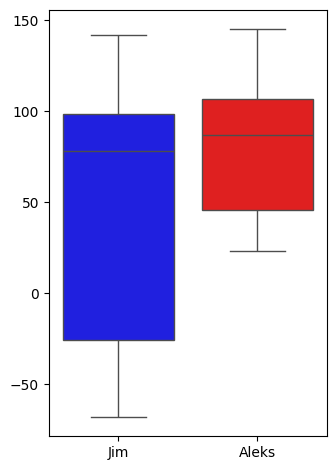

In [9]:
# Plot box plots
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
sns.boxplot(data=[jim_scores, aleks_scores], palette=["blue", "red"])
plt.xticks([0, 1], ['Jim', 'Aleks'])
plt.tight_layout()

plt.savefig('scores_box_plt.png')

plt.show()

## Time series analysis 

note: dates are not known exactly but are being added to the dataset artificually to capture the consecutive occurances of each game played. 

In [10]:
# generate the dates
dates = pd.date_range(start='2023-01-01', periods=len(jim_scores))

# create the dataframe
time_df = pd.DataFrame({
    'date': dates,
    'jim_scores': jim_scores,
    'aleks_scores': aleks_scores
})

time_df

,date,jim_scores,aleks_scores
0,2023-01-01,-68,110
1,2023-01-02,83,94
2,2023-01-03,-62,114
3,2023-01-04,142,23
4,2023-01-05,112,29
5,2023-01-06,-54,80
6,2023-01-07,94,44
7,2023-01-08,59,51
8,2023-01-09,73,96
9,2023-01-10,100,145


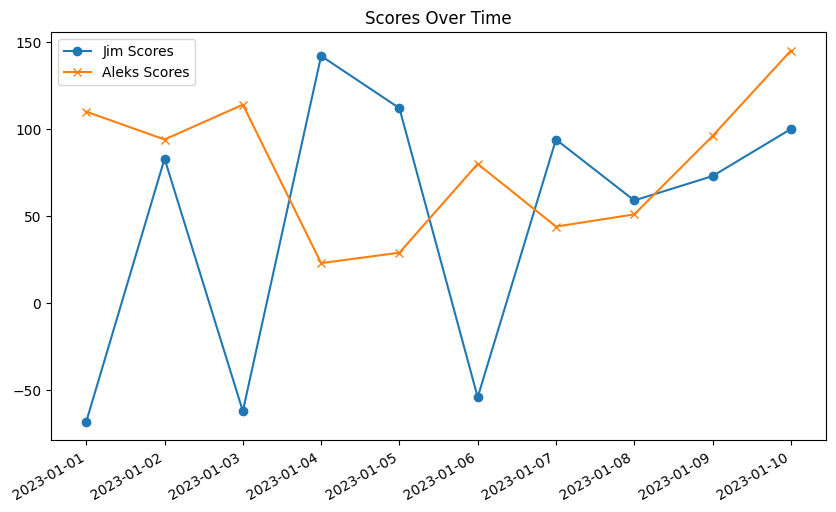

In [11]:
# set the date column as the index of the df
time_df.set_index('date', inplace=True)

plt.figure(figsize=(10,6))
plt.plot(time_df.index, time_df['jim_scores'], marker='o', label= 'Jim Scores')
plt.plot(time_df.index, time_df['aleks_scores'], marker='x', label='Aleks Scores')

plt.title('Scores Over Time')
plt.xlabel=('Date')
plt.ylabel=('Scores')
plt.legend()

plt.gcf().autofmt_xdate()

plt.savefig('scores_over_time_plt.png')

plt.show()


In [12]:
# calculate the running sum and compare the running sum analysis vs daily scores analysis 

df_running_sum = time_df.copy()

df_running_sum["jim_running_sum"] = df_running_sum['jim_scores'].cumsum()
df_running_sum["aleks_running_sum"] = df_running_sum['aleks_scores'].cumsum()

df_running_sum.head(10)

,jim_scores,aleks_scores,jim_running_sum,aleks_running_sum
date,,,,
2023-01-01,-68,110,-68,110
2023-01-02,83,94,15,204
2023-01-03,-62,114,-47,318
2023-01-04,142,23,95,341
2023-01-05,112,29,207,370
2023-01-06,-54,80,153,450
2023-01-07,94,44,247,494
2023-01-08,59,51,306,545
2023-01-09,73,96,379,641


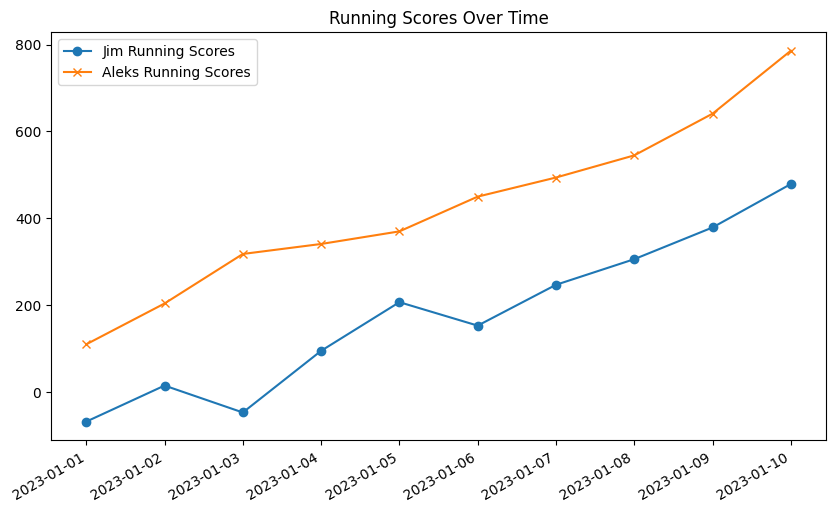

In [13]:
plt.figure(figsize=(10,6))
plt.plot(df_running_sum.index, df_running_sum['jim_running_sum'], marker='o', label= 'Jim Running Scores')
plt.plot(df_running_sum.index, df_running_sum['aleks_running_sum'], marker='x', label='Aleks Running Scores')

plt.title('Running Scores Over Time')
plt.xlabel=('Date')
plt.ylabel=('Running Scores')
plt.legend()

plt.gcf().autofmt_xdate()

plt.savefig('running_scores_over_time.png')

plt.show()

# Regression Analysis 

In [28]:
from sklearn.linear_model import LinearRegression

# reshape the data for scikit-learn (expects 2-d array for features)
X = np.arange(len(df_running_sum)).reshape(-1,1) # creates a sequence of game numbers as the feature
y_jim = df_running_sum['jim_running_sum'].values # response varibale for jim 
y_aleks = df_running_sum['aleks_running_sum'].values # response varibale for aleks

# create & fit the model for jim
model_jim = LinearRegression()
model_jim.fit(X, y_jim)

# create & fit the model for aleks
model_aleks = LinearRegression()
model_aleks.fit(X, y_aleks)

# PREDICT THE FUTURE (very reliably)
X_future = np.arange(len(df_running_sum), len(df_running_sum)+50).reshape(-1,1) # predict the next 50 games
y_future_jim = model_jim.predict(X_future)
y_future_aleks = model_aleks.predict(X_future)

# Find the game where each player's running sum reaches 3000
game_jim_reaches_3000 = X_future[np.argmax(y_future_jim >= 3000)] if np.any(y_future_jim >= 3000) else None
game_aleks_reaches_3000 = X_future[np.argmax(y_future_aleks >= 3000)] if np.any(y_future_aleks >= 3000) else None

print(f"Jim is predicted to reach 3000 points at game number: {game_jim_reaches_3000}")
print(f"Aleks is predicted to reach 3000 points at game number: {game_aleks_reaches_3000}")

Jim is predicted to reach 3000 points at game number: [53]
Aleks is predicted to reach 3000 points at game number: [44]


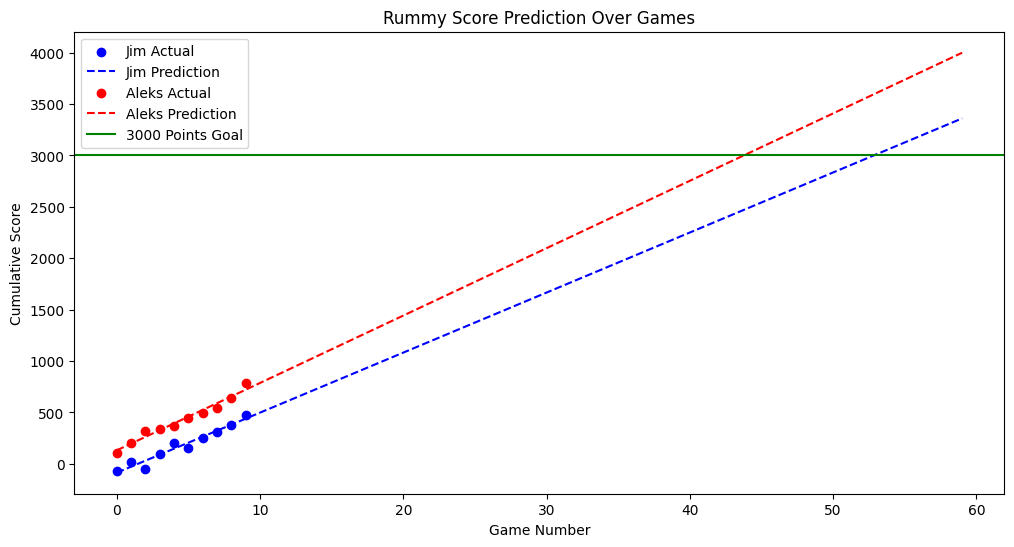

In [29]:
# Create the figure and axes objects
fig1, ax1 = plt.subplots(figsize=(12, 6))

# Plot Jim's data on the axes object
ax1.scatter(X, y_jim, color='blue', label='Jim Actual')
ax1.plot(np.concatenate((X, X_future)), model_jim.predict(np.concatenate((X, X_future))), color='blue', linestyle='--', label='Jim Prediction')

# Plot Aleks's data on the axes object
ax1.scatter(X, y_aleks, color='red', label='Aleks Actual')
ax1.plot(np.concatenate((X, X_future)), model_aleks.predict(np.concatenate((X, X_future))), color='red', linestyle='--', label='Aleks Prediction')

# Mark the 3000 point goal on the axes object
ax1.axhline(y=3000, color='green', linestyle='-', label='3000 Points Goal')

# Adding titles and labels on the axes object
ax1.set_title('Rummy Score Prediction Over Games')
ax1.set_xlabel('Game Number')
ax1.set_ylabel('Cumulative Score')

ax1.legend()

# Save the plot to a file using the figure object
fig1.savefig('plots/rummy_winner_prediction.png')

# Show the plot using the figure object
plt.show()

# Conclusion 
tbd   
.  
.  
.  
.  
.  
but prob not  ;)